In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv('Datasets/feature_dataset.csv')

dataset = dataset.reset_index()

col_names = [ 
    "Home Team ELO", "Away Team ELO", "Home XG", "Away XG", 
    "Home XGA", "Away XGA", "Home Win Percentage", "Home Draw Percentage", 
    "Away Win Percentage", "Away Draw Percentage", "Head2Head Win", 
    "Head2Head Draw", "Winner"
]

dataset = dataset[col_names]
dataset.head()

,Home Team ELO,Away Team ELO,Home XG,Away XG,Home XGA,Away XGA,Home Win Percentage,Home Draw Percentage,Away Win Percentage,Away Draw Percentage,Head2Head Win,Head2Head Draw,Winner
0,1676,1521,54.21,33.84,40.90,55.94,64.50,20.64,29.82,28.95,0,0,-1
1,1485,1520,38.63,37.45,53.75,51.46,24.01,26.97,26.52,25.10,0,0,0
2,1462,1692,48.21,44.89,56.39,46.18,27.27,29.22,36.44,28.54,0,0,0
3,1509,1680,46.69,57.40,52.39,57.04,32.51,25.29,39.62,25.83,0,0,-1
4,1420,1434,45.73,65.26,32.79,46.99,30.42,24.58,21.05,26.32,0,0,-1


Accuracy: 0.5789473684210527

Feature Weights for Logistic Regression:
Home Team ELO: 3.7206251932878255e-05
Away Team ELO: 5.421442641128968e-05
Home XG: -0.017078502859053962
Away XG: 0.013740831261353663
Home XGA: 0.020498333536754235
Away XGA: -0.016281013748920978
Home Win Percentage: -0.009680018047720442
Home Draw Percentage: 0.005521155231769624
Away Win Percentage: 0.001188411271174523
Away Draw Percentage: -0.00963774862966977
Head2Head Win: 0.005009458455211862
Head2Head Draw: -0.001869019156498555


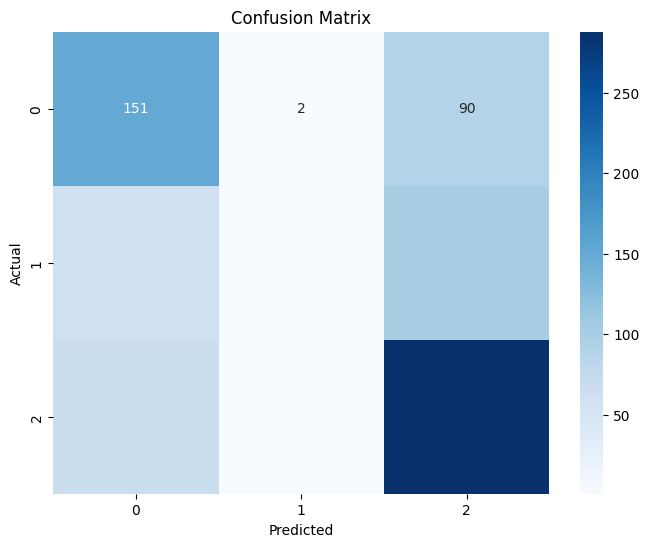

In [3]:
X = dataset.drop('Winner', axis=1)
y = dataset['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression_model = LogisticRegression(random_state=16, max_iter=10000, solver='saga')

logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

feature_weights = logistic_regression_model.coef_[0]
features = X.columns


print("\nFeature Weights for Logistic Regression:")
for feature, weight in zip(features, feature_weights):
    print(f"{feature}: {weight}")


from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Accuracy: 0.55

Feature Weights for SVM (Linear Kernel):
Home Team ELO: 9.394683923038736e-05
Away Team ELO: 0.0007316530081359023
Home XG: -0.008420480604223932
Away XG: 0.00948890443703561
Home XGA: 0.01123842963383758
Away XGA: -0.011012181134200522
Home Win Percentage: -0.005009644634668746
Home Draw Percentage: 0.0013202328829337827
Away Win Percentage: 0.0006448933868679788
Away Draw Percentage: -0.008549799143164706
Head2Head Win: 0.0026727354450782215
Head2Head Draw: -0.0010788804618598225


c:\Users\rahul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


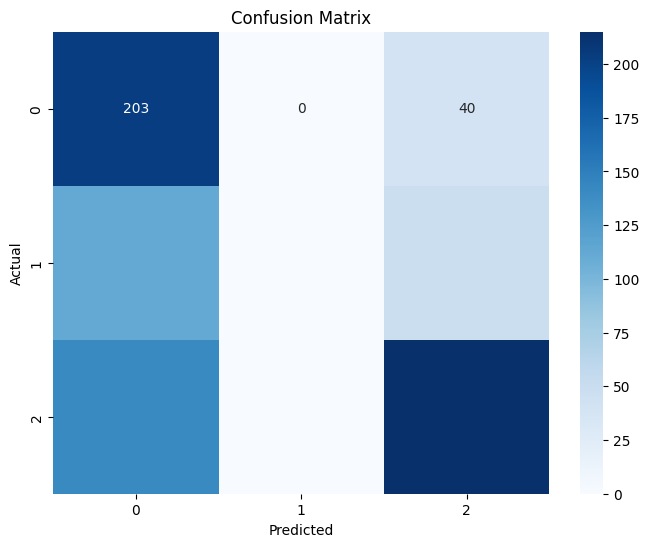

In [4]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Linear SVM model
svm_model = LinearSVC(random_state=16, max_iter=10000)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy:', accuracy_svm)

# Get feature weights from Linear SVM
feature_weights = svm_model.coef_[0]
features = X.columns

print("\nFeature Weights for SVM (Linear Kernel):")
for feature, weight in zip(features, feature_weights):
    print(f"{feature}: {weight}")

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree Accuracy: 0.6052631578947368

Feature Importances:
                 Feature  Importance
3                Away XG    0.151735
4               Home XGA    0.146545
0          Home Team ELO    0.113274
1          Away Team ELO    0.112888
5               Away XGA    0.075739
8    Away Win Percentage    0.074053
9   Away Draw Percentage    0.073390
6    Home Win Percentage    0.055261
7   Home Draw Percentage    0.054543
2                Home XG    0.053657
10         Head2Head Win    0.047140
11        Head2Head Draw    0.041776


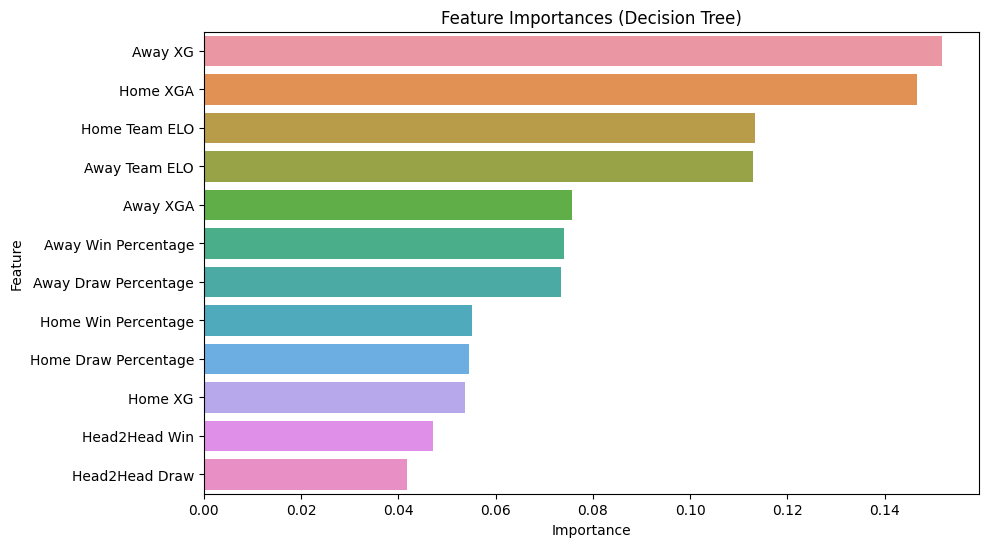

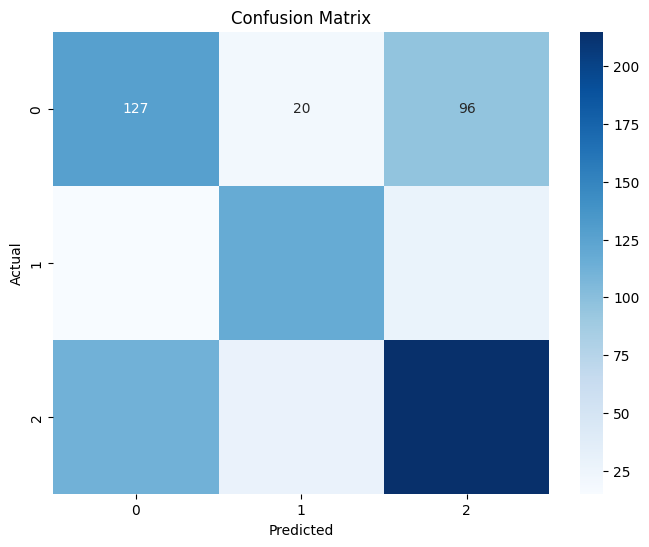

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=16)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy:', accuracy_dt)

# Get feature importances
feature_importances = decision_tree_model.feature_importances_
features = X.columns

# Display feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Plot the top most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances (Decision Tree)')
plt.show()

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest Accuracy: 0.6855263157894737
Random Forest F1 Score: 0.6852214091564939

Random Forest Feature Importances:
                 Feature  Importance
3                Away XG    0.139219
4               Home XGA    0.136898
1          Away Team ELO    0.097503
0          Home Team ELO    0.090584
8    Away Win Percentage    0.086436
6    Home Win Percentage    0.081334
2                Home XG    0.078897
5               Away XGA    0.076231
9   Away Draw Percentage    0.067522
7   Home Draw Percentage    0.066639
10         Head2Head Win    0.040376
11        Head2Head Draw    0.038359


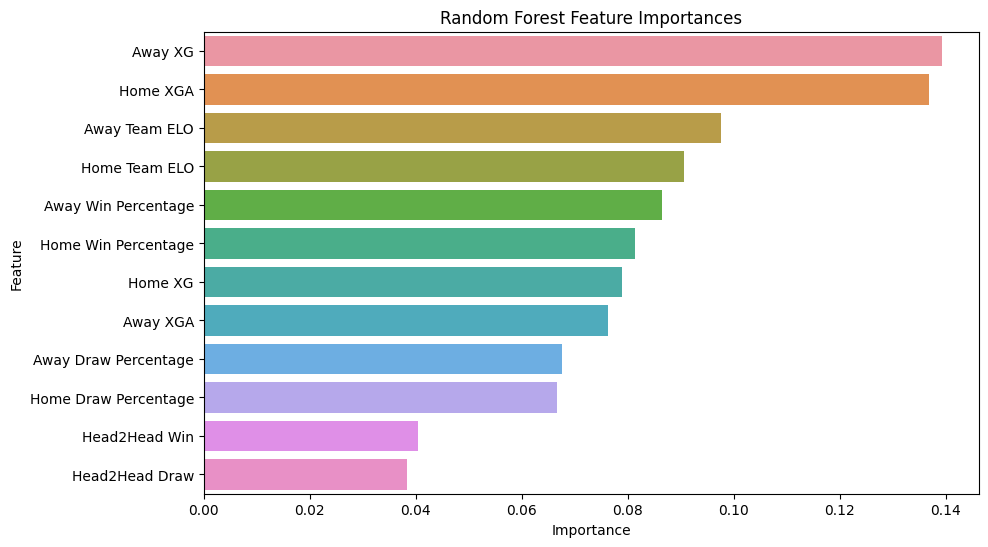

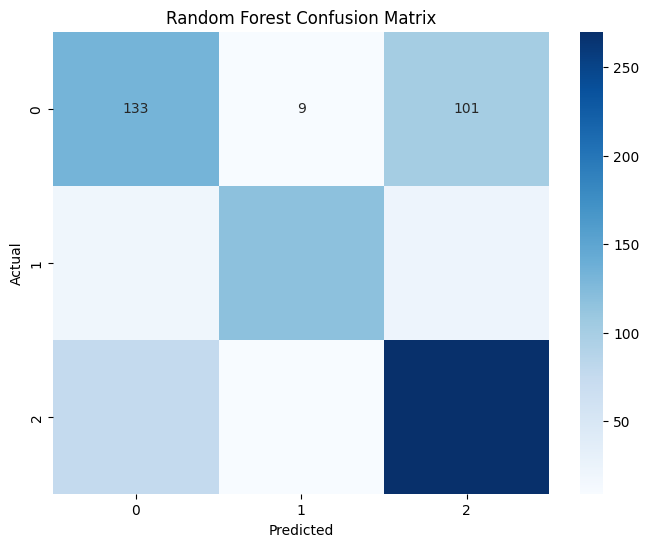

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=16, n_estimators=2000)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)

f1_rf = f1_score(y_test, y_pred_rf, average='weighted')  # 'weighted' accounts for class imbalance
print('Random Forest F1 Score:', f1_rf)

# Get feature importances
feature_importances_rf = random_forest_model.feature_importances_
features = X.columns

# Display feature importances
importance_df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(importance_df_rf)

# Plot the top most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf)
plt.title('Random Forest Feature Importances')
plt.show()

# Confusion matrix for Random Forest
cnf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [7]:
team2 = "Liverpool"
team1 = "Arsenal"

# col_names = [ 
#     "Home Team ELO", "Away Team ELO", "Home XG", "Away XG", 
#     "Home XGA", "Away XGA", "Home Win Percentage", "Home Draw Percentage", 
#     "Away Win Percentage", "Away Draw Percentage", "Head2Head Win", 
#     "Head2Head Draw", "Winner"
# ]

elo_dataset = pd.read_csv('Datasets/Team Stats/ELO_Team_Ratings.csv')
home_team_elo = elo_dataset[elo_dataset['Team'] == team1]['Rating'].values[0]
away_team_elo = elo_dataset[elo_dataset['Team'] == team2]['Rating'].values[0]

xg_dataset = pd.read_csv('Datasets/Team Stats/XG_Team_Ratings.csv')
home_team_xg = xg_dataset[xg_dataset['Team'] == team1]['xG'].values[0]
away_team_xg = xg_dataset[xg_dataset['Team'] == team2]['xG'].values[0]
home_team_xga = xg_dataset[xg_dataset['Team'] == team1]['xGA'].values[0]
away_team_xga = xg_dataset[xg_dataset['Team'] == team2]['xGA'].values[0]

percentage_dataset = pd.read_csv('Datasets/Team Stats/team_stats.csv')
home_win_percentage = percentage_dataset[percentage_dataset['Team'] == team1]['Win Percentage'].values[0]
home_draw_percentage = percentage_dataset[percentage_dataset['Team'] == team1]['Draw Percentage'].values[0]
away_win_percentage = percentage_dataset[percentage_dataset['Team'] == team2]['Win Percentage'].values[0]
away_draw_percentage = percentage_dataset[percentage_dataset['Team'] == team2]['Draw Percentage'].values[0]

head2head_dataset = pd.read_csv('Datasets/Team Stats/Head2Head.csv')
# Ensure each condition is enclosed in parentheses
head2head_win = head2head_dataset[(head2head_dataset['Home'] == team1) & (head2head_dataset['Away'] == team2)]['Win Percentage'].values[0]
head2head_draw = head2head_dataset[(head2head_dataset['Home'] == team1) & (head2head_dataset['Away'] == team2)]['Draw Percentage'].values[0]

entry = [home_team_elo, away_team_elo, home_team_xg, away_team_xg, home_team_xga, away_team_xga, home_win_percentage, home_draw_percentage, away_win_percentage, away_draw_percentage, head2head_win, head2head_draw]

entry_df = pd.DataFrame([entry], columns=X.columns)

# Step 5: Make a prediction using the trained classifier
predicted_result = random_forest_model.predict(entry_df)

print(f"The predicted result of the match between {team1} and {team2} is: {predicted_result[0]}")


The predicted result of the match between Arsenal and Liverpool is: 0
